In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
titanic = pd.read_csv('/content/tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

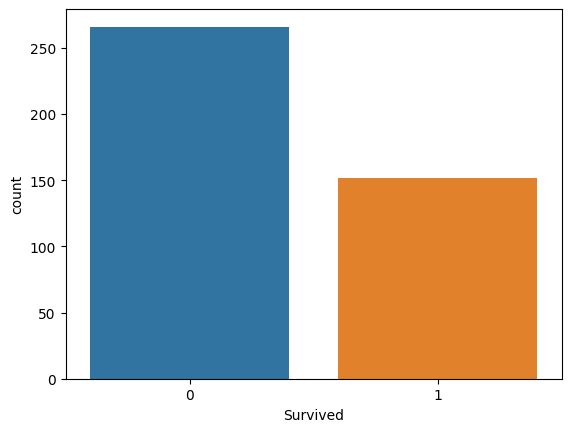

In [6]:
sns.countplot(x='Survived',data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

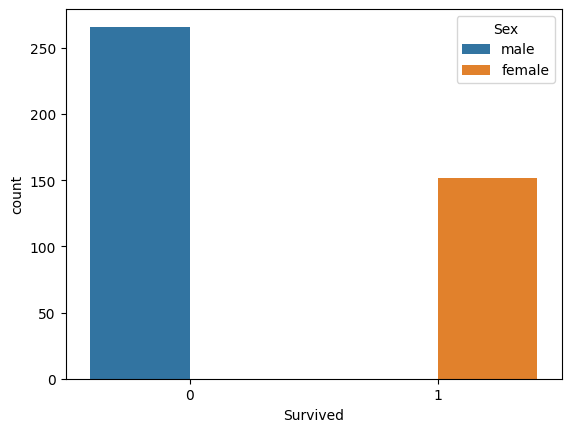

In [7]:
sns.countplot(x='Survived',hue='Sex',data=titanic,)

<Axes: ylabel='Frequency'>

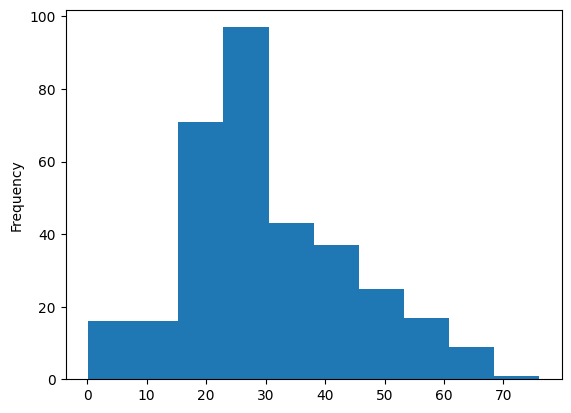

In [8]:
titanic['Age'].plot.hist()

#Data Wrangling

In [9]:
# checking how many null values we have
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

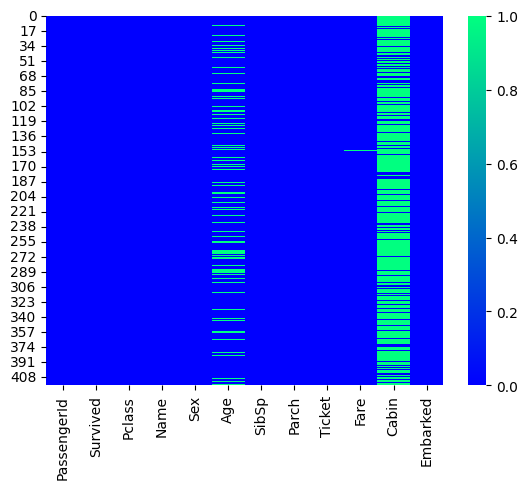

In [10]:
sns.heatmap(titanic.isnull(),cmap='winter')

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<Axes: >

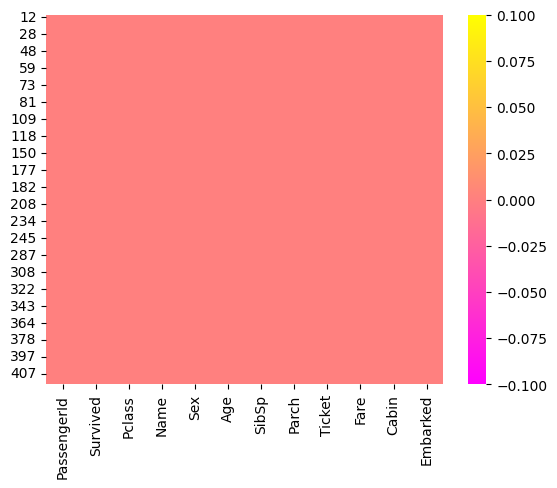

In [11]:
titanic.dropna(inplace=True)
print(titanic.isnull().sum())
sns.heatmap(titanic.isnull(),cmap = 'spring')

In [13]:
pd.get_dummies(titanic['Sex']).head()

,female,male
12,1,0
14,1,0
24,1,0
26,1,0
28,0,1


In [17]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
12,0
14,0
24,0
26,0
28,1


In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [24]:
embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)
embarked.head()

,Q,S
12,0,1
14,0,1
24,0,0
26,0,0
28,0,1


In [26]:
Pcl=pd.get_dummies(titanic['Pclass'],drop_first=True)
Pcl.head()

,2,3
12,0,0
14,0,0
24,0,0
26,0,0
28,0,0


In [27]:
titanic = pd.concat([titanic,sex,embarked,Pcl],axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,0,0,1,0,0
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,0,0,1,0,0
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,0,0,0,0,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,0,0,0,0,0
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1,0,1,0,0


In [45]:

titanic

,Survived,Age,SibSp,Parch,male,Q,S,2,3
12,1,23.0,1,0,0,0,1,0,0
14,1,47.0,1,0,0,0,1,0,0
24,1,48.0,1,3,0,0,0,0,0
26,1,22.0,0,1,0,0,0,0,0
28,0,41.0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
404,0,43.0,1,0,1,0,0,0,0
405,0,20.0,0,0,1,0,0,1,0
407,0,50.0,1,1,1,0,0,0,0
411,1,37.0,1,0,0,1,0,0,0


#Training


In [46]:
X=titanic.drop('Survived',axis=1)
Y=titanic['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state = 4)

#The Algorithm of choice is Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
X_train= X_train.rename(str,axis="columns")
X_test= X_test.rename(str,axis="columns")


In [76]:
lm.fit(X_train,Y_train)

LogisticRegression()

In [83]:
prediction = lm.predict(X_test)

In [84]:
from sklearn.metrics import classification_report
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[18,  0],
       [ 0, 11]])

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)


1.0

In [89]:
y_pred = lm.predict(X_test)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        11

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

